In [4]:
%matplotlib inline

In [3]:
import sys
sys.path.insert(0, "../scripts")
import numpy as np
import matplotlib.pyplot as plt
import changepoint_detector.gaussian_model as gm
import changepoint_detector.changepoint_detector as chd
# this isn't really a test, it just makes a pretty picture
# but we also note that (after t0) the probability of reset is always exactly the reset_prob
num_variables = 1
apriori_n = 3.0
apriori_mean = np.zeros(num_variables)
apriori_ssd = np.ones(num_variables) * 2
model_generator = gm.GaussianPredictor(num_variables, apriori_n, apriori_mean, apriori_n / 2, apriori_ssd / 2).Fit
chunk_length = 30
np.random.seed(0)
part_1 = np.random.normal(0,1, size=(chunk_length,1))
part_2 = np.random.normal(0,4,size=(chunk_length,1))
part_3 = np.random.normal(0,16,size=(chunk_length,1))
part_4 = np.random.normal(0,64,size=(chunk_length,1))

in_data = np.concatenate((part_1, part_2, part_3, part_4))

max_duration = 300
reset_prob = 1/(30)
change_detector = chd.ChangepointDetector(in_data, reset_prob, model_generator, max_duration)
result_probs = change_detector.ModelChangepoints()
plt.plot(in_data)

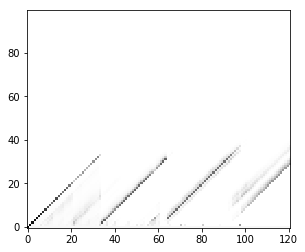

In [5]:
plt.imshow(np.transpose(1-result_probs[:,0:100]), cmap='gray', origin='lower')

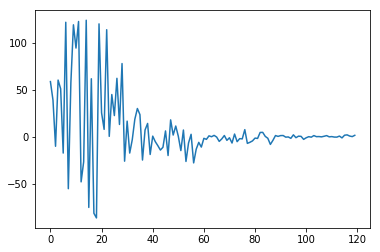

In [6]:
in_data = np.flip(in_data)


max_duration = 300
reset_prob = 1/(30)
change_detector = chd.ChangepointDetector(in_data, reset_prob, model_generator, max_duration)
result_probs = change_detector.ModelChangepoints()
plt.plot(in_data)

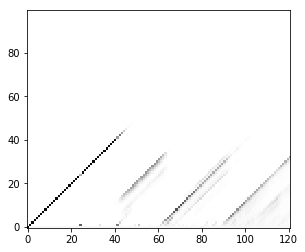

In [7]:
plt.imshow(np.transpose(1-result_probs[:,0:100]), cmap='gray', origin='lower')